In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter


In [ ]:
# plotting figure 5
F5_s=pd.read_excel("fig 6.xlsx",sheet_name = "stick",nrows=11)
F5_2030nl=pd.read_excel("fig 6.xlsx",sheet_name = "2030nl",nrows=11)
F5_2030l=pd.read_excel("fig 6.xlsx",sheet_name = "2030l",nrows=11)
F5_2040nl=pd.read_excel("fig 6.xlsx",sheet_name = "2040nl",nrows=11)
F5_2040l=pd.read_excel("fig 6.xlsx",sheet_name = "2040l",nrows=11)
indicator = F5_s['indicator']

In [ ]:
year = [2020, 2025, 2030, 2035, 2040, 2045, 2050]

In [ ]:
#calculating change
F5_s2 = F5_s.apply(pd.to_numeric, errors='coerce')
F5_2030nl2 = F5_2030nl.apply(pd.to_numeric, errors='coerce')
F5_2030l2 = F5_2030l.apply(pd.to_numeric, errors='coerce')
F5_2040nl2 = F5_2040nl.apply(pd.to_numeric, errors='coerce')
F5_2040l2 = F5_2040l.apply(pd.to_numeric, errors='coerce')

F5_2030nl_use = F5_2030nl2.div(F5_s2).sub(1)
F5_2030l_use = F5_2030l2.div(F5_s2).sub(1)
F5_2040nl_use = F5_2040nl2.div(F5_s2).sub(1)
F5_2040l_use = F5_2040l2.div(F5_s2).sub(1)

F5_2030nl_use = F5_2030nl_use.dropna(axis=1, how='all')
F5_2030l_use = F5_2030l_use.dropna(axis=1, how='all')
F5_2040nl_use = F5_2040nl_use.dropna(axis=1, how='all')
F5_2040l_use = F5_2040l_use.dropna(axis=1, how='all')

F5_2030nl_use.replace([np.inf, -np.inf], 0, inplace=True)
F5_2030l_use.replace([np.inf, -np.inf], 0, inplace=True)
F5_2040nl_use.replace([np.inf, -np.inf], 0, inplace=True)
F5_2040l_use.replace([np.inf, -np.inf], 0, inplace=True)

F5_2030nl_use['indicator']=indicator
F5_2030l_use['indicator']=indicator
F5_2040nl_use['indicator']=indicator
F5_2040l_use['indicator']=indicator

F5_2030nl_use['scenario']='2030nl'
F5_2030l_use['scenario']='2030l'
F5_2040nl_use['scenario']='2040nl'
F5_2040l_use['scenario']='2040l'


,i2020,i2025,i2030,i2035,i2040,i2045,i2050,indicator,scenario
0,-0.016334,-0.388022,-0.437101,-0.281663,-0.161797,-0.207721,-0.294572,biomass consumption,2030l
1,-0.000891,0.061361,0.025647,-0.000168,-0.016640,0.009172,0.070545,Oil consumption,2030l
2,-0.027818,-0.114499,0.007321,-0.003212,-0.008981,0.056910,0.159390,Gas consumption,2030l
3,-0.000121,0.295156,0.207616,-0.028939,-0.053946,0.018610,0.180246,Coal consumption,2030l
4,0.349401,0.015191,0.927353,-0.214671,0.385228,0.602792,1.018844,Wind and solar capacity addition,2030l
5,-0.252923,2.706188,0.000000,-0.756917,-0.205315,0.666222,1.801903,Fossil without CCS capacity,2030l
6,0.349401,0.015191,0.927353,-0.214671,0.385228,0.602792,1.018844,Wind and solar capacity,2030l
7,-0.321119,0.772931,0.154898,6.650453,0.333971,-0.161977,0.123710,Retirement of fossil without CCS capacity,2030l
8,NaN,-0.750280,0.215476,-0.304014,0.167084,0.129834,0.160629,Fossil with CCS capacity addition,2030l
9,0.010129,2.374650,1.887620,0.900898,2.582498,4.103432,5.238306,EV sale,2030l


In [ ]:
dataframes = [F5_2040nl_use, F5_2040l_use]
merged_df = pd.concat(dataframes)



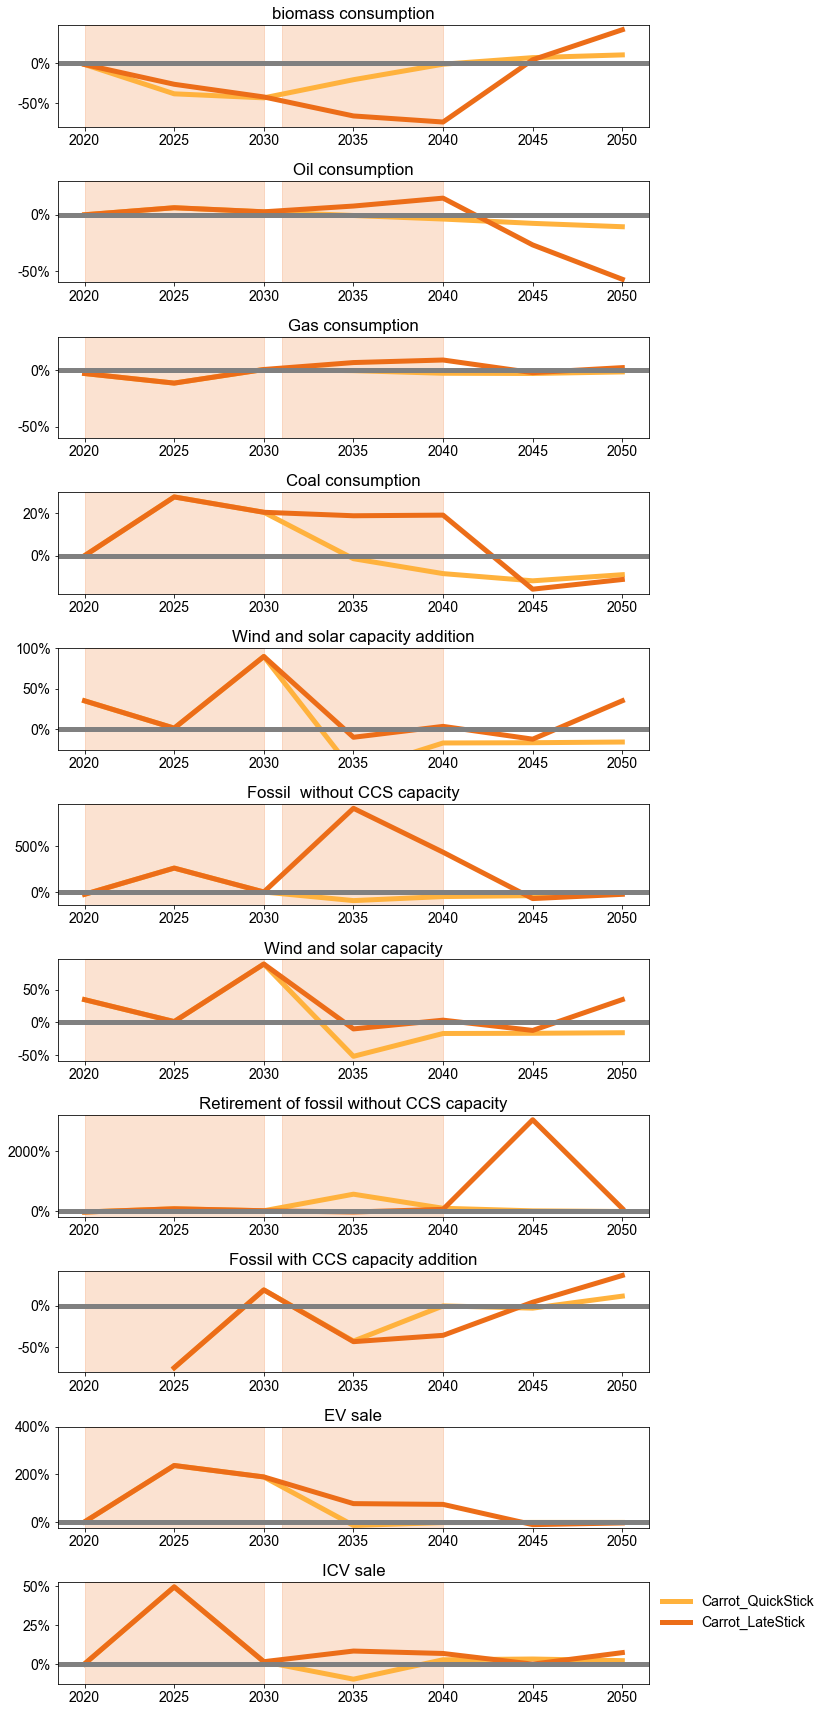

In [ ]:

dataframes2 = [F5_2030nl_use, F5_2040nl_use]


merged_df2 = pd.concat(dataframes2)

matplotlib.rcParams['font.family'] = 'Arial'

plt.rcParams['font.size'] = 14

indicator_values2 = merged_df2['indicator'].unique()

fig, axs = plt.subplots(len(indicator_values2), 1, figsize=(13, 25)
                       )
scenarios2 = [
    '2030nl', 

    '2040nl'
            ]
colors2 = ['#FFB23D', '#EC6D18', 
         ]
linestyles2 = ['-', '-']
labels2 = ["Carrot_QuickStick", "Carrot_LateStick" ]
www=5  #line width

for i, indicator_value in enumerate(indicator_values2):
    subset_df = merged_df2[merged_df2['indicator'] == indicator_value]
    

    for j, scenario in enumerate(scenarios2):
        label = labels2[j]
        scenario_subset = subset_df[subset_df['scenario'] == scenario]
        scenario_subset2 = scenario_subset[['i2020','i2025','i2030','i2035','i2040','i2045','i2050']]
        scenario_subset3 = scenario_subset2.iloc[0].values
        axs[i].plot(year, scenario_subset3, label=label, color=colors2[j], linestyle=linestyles2[j], linewidth=www)
        axs[i].axvspan(2020, 2030, color='#EC6D18', alpha=0.1) 
        axs[i].axvspan(2031, 2040, color='#EC6D18', alpha=0.1)



    axs[i].set_title(f'{indicator_value}')
#     axs[i].set_ylabel('Change compared with "Stick-only"case')
    axs[i].axhline(y=0, color='grey', linestyle='-', linewidth=www)


    axs[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

axs[1].set_ylim(-0.6,0.3)
axs[2].set_ylim(-0.6,0.3)
axs[4].set_ylim(-0.25, 1)
axs[9].set_ylim(-0.25, 4)

axs[-1].legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)

plt.tight_layout(rect=[0, 0, 0.9, 0.96]) 
# plt.savefig("Figure 5 gas ylim change 20241005.svg", transparent = True)

plt.show()
